1. What is NumPy, and why is it widely used in Python?

- NumPy is a fundamental, open-source Python library for numerical computing. It provides a high-performance multidimensional array object, the ndarray, and an extensive collection of functions to operate on these arrays efficiently. The name is a portmanteau of "Numerical Python".
Why NumPy is widely used in Python
1. Faster and more memory-efficient than Python lists
While Python's built-in lists can store elements of different data types, NumPy arrays are designed to be homogeneous (all elements are of the same type). This allows NumPy arrays to store data in a contiguous block of memory, which significantly improves speed and reduces memory usage for large datasets.
2. Vectorization of mathematical operations
NumPy performs operations on entire arrays at once, a concept known as vectorization. This eliminates the need for slow explicit Python loops, which makes the code more concise, readable, and faster.
For example, to add two arrays a and b in NumPy, you simply write a + b, which is far more efficient than iterating through each element with a loop.
3. Support for multidimensional arrays
NumPy's ndarray objects can have any number of dimensions, making them ideal for representing matrices, tensors, and other forms of numerical data. This is crucial for applications in linear algebra, image processing, and machine learning.
4. Broadcasting functionality
Broadcasting is a powerful feature that allows NumPy to perform arithmetic operations on arrays of different shapes. It automatically aligns and "stretches" the smaller array to be compatible with the larger one, without creating copies of the data.
5. Extensive library of mathematical functions
NumPy provides a wide array of optimized mathematical functions (known as "ufuncs" or universal functions) for tasks ranging from basic arithmetic to complex operations like linear algebra, Fourier transforms, and random number generation.
6. Foundation of the scientific computing ecosystem
NumPy is the base upon which many other popular scientific Python libraries are built. These include:
Pandas: Uses NumPy arrays for its core DataFrame and Series objects.
SciPy: Offers a more extensive collection of scientific computing routines.
Scikit-learn: A machine learning library that relies on NumPy arrays for data representation.
Matplotlib: A plotting library that uses NumPy arrays to generate visualizations.

2. How does broadcasting work in NumPy?

- Broadcasting is a set of rules used by NumPy to perform element-wise arithmetic operations on arrays that have different shapes. It avoids unnecessary duplication of memory, allowing for efficient vectorization without explicit loops.
The broadcasting rules determine whether two arrays are compatible for an operation and what the shape of the resulting array will be. The compatibility check is performed by comparing the shapes of the two arrays from the rightmost dimension to the left.
NumPy broadcasting rules
Match dimensions: If the two arrays have a different number of dimensions, the shape of the array with fewer dimensions is padded with ones on its left side until both arrays have the same number of dimensions.
Compare shapes: The two arrays are compatible if, for each dimension, the sizes are either equal or one of them is 1.
Resulting shape: The size of the output shape in each dimension is the maximum of the corresponding sizes of the input arrays.
Incompatibility error: If the sizes disagree in any dimension and neither size is 1, a ValueError is raised.
Examples of broadcasting
Example 1: Scalar and array
This is the simplest form of broadcasting. When a scalar is combined with an array, NumPy treats the scalar as an array with a dimension of 1 and broadcasts it to match the shape of the larger
array.

'''import numpy as np

a = np.array([1, 2, 3])
b = 5

result = a + b
print(f"a.shape: {a.shape}")
print(f"b: {b}")
print(f"result: {result}")'''
# Output:
# a.shape: (3,)
# b: 5
# result: [6 7 8]

How it works:
Step 1: The scalar b is conceptually given a dimension of 1, so its shape becomes (1,).
Step 2: Comparing a.shape (3,) and the conceptual b.shape (1,), the dimensions are compatible because the size 1 can be stretched to 3.
Step 3: The operation is performed, adding 5 to each element of a.


Example 2: 1D array and 2D array

This demonstrates broadcasting across dimensions to perform an operation on each row or column.

'''import numpy as np

M = np.ones((2, 3))
a = np.arange(3)

print(f"M.shape: {M.shape}")
print(f"a.shape: {a.shape}")

result = M + a
print(f"\nResult:\n{result}")'''
# Output:
# M.shape: (2, 3)
# a.shape: (3,)
#
# Result:
# [[1. 2. 3.]
#  [1. 2. 3.]]

How it works:

Step 1: The smaller-dimension array, a, is padded on the left. Its shape changes from (3,) to (1, 3).
Step 2: The shapes (2, 3) and (1, 3) are compared from right to left. Both trailing dimensions are 3. The next dimension for a is 1, which is stretched to 2 to match M.
Step 3: a is conceptually stretched to match M's shape, and the element-wise addition is performed.
Example 3: Incompatible shapes
If the dimensions do not match and neither has a size of 1, broadcasting will fail.

Example 3: Incompatible shapes
If the dimensions do not match and neither has a size of 1, broadcasting will fail.

'''import numpy as np

M = np.ones((3, 2))
a = np.arange(3)

print(f"M.shape: {M.shape}")
print(f"a.shape: {a.shape}")

try:
    M + a
except ValueError as e:
    print(f"\nError: {e}")'''
# Output:
# M.shape: (3, 2)
# a.shape: (3,)
#
# Error: operands could not be broadcast together with shapes (3,2) (3,)

How it works:

Step 1: a's shape is padded, becoming (1, 3).
Step 2: The shapes (3, 2) and (1, 3) are compared from right to left.
The last dimension is 2 and 3. They are not equal, and neither is 1.
Step 3: A ValueError is raised because the arrays are not broadcastable.

3. What is a Pandas DataFrame?

- A Pandas DataFrame is a two-dimensional, mutable, and tabular data structure with labeled axes (rows and columns). It is the primary data structure of the Pandas library for the Python programming language and serves as a powerful and flexible tool for data manipulation and analysis.
Core components and features
Tabular structure: You can think of a DataFrame as a table similar to an Excel spreadsheet or a SQL database table.
Labeled axes: Both the rows and columns have labels, which can be integers (like array indexing) or custom names.
Heterogeneous data types: Unlike a NumPy array, which is homogenous, a DataFrame can hold columns of different data types, such as integers, floats, strings, and booleans.
Collection of Series: A DataFrame is built from and can be thought of as a dictionary-like container of Pandas Series objects, where each column is a Series that shares a common index.
Size-mutable: DataFrames can be resized, meaning you can add or remove rows and columns.
Why DataFrames are so useful
Handling diverse data: Its ability to store different data types in a single structure makes it ideal for working with real-world, often messy, datasets.
Data cleaning and preprocessing: Pandas offers a wide range of built-in functions for tasks like handling missing data, filtering, and renaming rows or columns.
Efficient operations: Since Pandas is built on top of NumPy, it leverages its underlying power for fast, vectorized operations, especially on large datasets.
Integration with external data: DataFrames can easily import and export data from a variety of file formats, including CSV, Excel, and SQL databases.
Data analysis: It provides powerful functionalities for grouping, aggregating, and summarizing data, which are crucial steps in the data analysis workflow.

4. Explain the use of the groupby()
method in Pandas.

The groupby() method in Pandas is used to split a DataFrame into groups based on some criterion. This process, often referred to as "split-apply-combine," is a fundamental and powerful feature for performing data analysis.
How groupby() works: The "split-apply-combine" strategy
Split: The original DataFrame is split into smaller, independent groups based on the values in one or more specified columns.
Apply: A function (e.g., an aggregation, transformation, or filtering) is applied to each of these smaller groups.
Combine: The results of the applied functions are combined into a new, consolidated DataFrame or Series.
Common uses of groupby()
Aggregation: Summarizing data for each group
This is the most common use case. After grouping, you can apply a variety of aggregate functions to calculate summary statistics for each group.
Example: Calculating the average score per student
To calculate the average score for each student, you can group the DataFrame by the 'student' column and then apply the mean() aggregation function to the 'score' column. You can also group by multiple columns by passing a list of column names.
Transformation: Modifying data within each group
The transform() method allows you to apply a function to each group and return a DataFrame or Series with the same index as the original DataFrame. This is useful for tasks like standardizing data within each group. For example, you can calculate each student's score relative to their own average score.
Filtering: Excluding groups based on a condition
The filter() method is used to keep or discard entire groups based on whether they satisfy a given condition. For instance, you could filter a DataFrame to only include students who have more than one entry.

5. Why is Seaborn preferred for statistical visualizations?

- Seaborn is a Python library built on top of Matplotlib that is specifically designed for creating statistical visualizations. While Matplotlib offers broad and deep functionality, Seaborn provides a high-level, opinionated interface that simplifies the creation of attractive, informative, and statistically-focused graphics with far less code.
Key reasons for using Seaborn over Matplotlib for statistical visualizations

1. Aesthetically pleasing defaults
Seaborn comes with built-in, visually appealing themes and color palettes that make plots look professional without any manual tweaking. This allows users to focus on data interpretation rather than design aesthetics. In contrast, Matplotlib plots often require significant code to adjust colors, styles, and other visual aspects to achieve a polished look.

2. Specialized for statistical graphics
Unlike Matplotlib, which is a general-purpose plotting library, Seaborn includes functions tailored for specific statistical visualization needs. This includes advanced plots for:
Distribution: Easily plot univariate and bivariate distributions with histplot() and kdeplot().
Categorical data: Functions like barplot(), boxplot(), and violinplot() help visualize relationships between categorical and quantitative variables.
Multivariate relationships: Advanced plots like pairplot() and jointplot() allow for the quick exploration of complex datasets with many variables.
Linear regression: regplot() and lmplot() can automatically fit and visualize linear regression models with confidence intervals.

3. Seamless integration with Pandas
Seaborn is designed to work efficiently with Pandas DataFrames. Plotting functions can directly accept DataFrame column names for the x, y, hue, and other parameters, eliminating the need to extract data into separate variables. This streamlines the data analysis workflow, making it a natural extension of Pandas for exploratory data analysis.

4. Automated complexity handling
Seaborn abstracts away much of the boilerplate code required by Matplotlib to create complex, multi-layered plots. For example, pairplot() can generate a grid of scatter plots and histograms for every pairwise combination of variables in a single command. This makes it far easier to create complex, multi-panel visualizations that would require many more steps with Matplotlib alone.

5. Built-in statistical estimation
Many Seaborn plots automatically perform statistical estimation and aggregation before plotting. For example, a bar plot can display the mean of a variable for different categories, and many plots automatically show confidence intervals for those estimates. This functionality is integrated directly into the plotting functions, providing immediate insights into the underlying data distribution.

6. What are the differences between NumPy arrays and Python lists?

- While both NumPy arrays (ndarray) and Python lists are used to store collections of data, they have fundamental differences that make them suitable for different tasks. NumPy arrays are optimized for numerical computation, while Python lists are more flexible for general-purpose use.

Comparison of NumPy arrays vs. Python
lists
Feature     NumPy Array (ndarray)  
 Python List

Data type   Homogeneous: All elements must be of the same data type. This allows for more compact and efficient storage.    Heterogeneous: Can contain elements of different data types (e.g., integers, floats, strings) within the same list. This provides flexibility but adds overhead.

Performance Faster: Optimized for numerical operations, especially on large datasets. NumPy's core routines are written in C, leading to significantly faster execution.    Slower: For large numerical computations, lists are much slower due to the overhead of dynamic typing and storing different data types.
Memory usage    Memory-efficient: Stores elements in a contiguous block of memory, which is more compact and cache-friendly.

This reduces memory consumption for large arrays.  Higher memory usage: Stores elements in scattered memory locations, with each element's entry also storing type information and reference count overhead.

Vectorization   Built-in: Supports powerful vectorized operations, allowing for element-wise mathematical operations on entire arrays without explicit loops.   No built-in support: Mathematical operations generally require explicit Python loops, which are less efficient than vectorized operations.
Dimensions  Multidimensional: Designed to handle n-dimensional arrays, making it ideal for tasks in linear algebra, machine learning, and image processing. One-dimensional: Primarily a 1D data structure. While you can create a list of lists, it's not optimized for multidimensional operations.

Size    Fixed size: The size is fixed at creation. Resizing an ndarray creates a new array in memory.   Dynamic size: Can grow or shrink in size dynamically by adding or removing elements.
Creation    Requires importing the NumPy library (e.g., import numpy as np).    A built-in data structure in Python, created using square brackets [].
Use case    Best for numerical and scientific computing, especially when performance on large datasets is critical. Excellent for general-purpose tasks that require flexibility, like storing different object types or frequent insertions and deletions.

7. What is a heatmap, and when should
it be used?
- A heatmap is a graphical representation of data that uses a color-coded system to visualize degrees of intensity or activity, making it easy to spot patterns, trends, and anomalies. The data is often displayed as a grid or
 two-dimensional matrix, where warmer colors (such as red and orange) represent higher values, and cooler colors (like blue and green) represent lower values.

A heatmap is most effective when you want to quickly analyze patterns and simplify large amounts of data. Key applications include:
Analyzing user behavior: Use heatmaps to understand how visitors interact with your website. This helps you optimize website design, content placement, and calls-to-action to improve engagement and conversion rates.

Exploratory data analysis: Heatmaps are excellent for getting a high-level overview of a new dataset. They can quickly highlight correlations, clusters, and outliers that might be hidden in raw data.
Monitoring performance: In fields like manufacturing or finance, heatmaps can be used on a dashboard to monitor key metrics in real-time. This helps quickly identify bottlenecks or anomalies that require immediate attention.

Geographic analysis: For visualizing any data that has a spatial component, such as sales performance by region, foot traffic in a store, or population density.
Comparison and testing: When conducting A/B tests or comparing data across different categories, a heatmap can visually show how different versions or groups perform against each other.

8. What does the term "vectorized operation" mean in NumPy?

- In NumPy, a vectorized operation is the process of applying a mathematical or logical function to an entire array or sequence of data at once, rather than using a Python for loop to process each element individually. This leverages highly optimized, pre-compiled code (often written in C or Fortran) that runs much faster than standard Python loops, leading to significant performance improvements.

9. How does Matplotlib differ from  Plotly?

Matplotlib and Plotly are both powerful Python libraries for data visualization, but they differ significantly in their core strengths and typical use cases:

Interactivity:

Matplotlib: Primarily designed for creating static, publication-quality plots. While some basic interactive features exist (like zooming and panning in certain environments), its strength lies in generating images for reports and papers.

Plotly: Excels at creating interactive, web-based visualizations. Plotly charts can be easily embedded in web applications and dashboards, allowing users to hover, zoom, pan, and filter data directly within the visualization.

Customization vs. Aesthetics:

Matplotlib: Offers extensive and granular control over every aspect of a plot's appearance. This allows for highly customized, specific visualizations but can require more code and effort.

Plotly: Provides elegant default aesthetics and built-in themes, often producing visually appealing interactive plots with less code. While customizable, it might offer less fine-grained control compared to Matplotlib in some areas.

Ease of Use for Specific Tasks:
Matplotlib: Can be more verbose for complex visualizations due to its emphasis on detailed control.

Plotly Express: A high-level API within Plotly, simplifies the creation of common interactive plots with minimal code, making it very user-friendly for quick exploration and dashboard building.

Output Format:

Matplotlib: Typically outputs static image files (PNG, JPG, PDF, SVG) or displays plots in interactive environments like Jupyter notebooks.
Plotly: Generates interactive HTML files or can be integrated into web applications for dynamic, browser-based visualizations.

10. What is the significance of
hierarchical indexing in Pandas?

-Hierarchical indexing, or MultiIndex, is significant in Pandas because it allows for the representation and manipulation of higher-dimensional data within lower-dimensional structures like DataFrames, enabling complex data analysis by using multiple levels of indexing to group and select data more efficiently. This capability is crucial for managing nested data, preserving relationships between different data levels, and performing advanced queries on grouped or structured data.

Key Significances of Hierarchical Indexing:

Handles Higher-Dimensional Data:
It allows you to store and work with data that has more than two dimensions by adding additional levels of index to a Series or DataFrame.

Sophisticated Data Analysis:

It opens doors to more complex data analysis and manipulation by providing a framework for organizing and accessing data with multiple categorical variables.

Preserves Data Relationships:

Hierarchical indexing helps maintain the inherent relationships and structure of the data, which is vital for tasks like working with nested categories or grouped information.

Optimized Data Selection:

By using multiple index levels, you can select specific subsets of data more precisely and efficiently, making complex queries simpler to construct.

Intuitive Data Structuring:

It provides a natural way to structure data that naturally fits into a hierarchical format, such as employees within departments and locations, or product categories and subcategories.
Enables Powerful Grouping and Pivoting:
In conjunction with methods like groupby(), pivot_table(), and unstack(), hierarchical indexing facilitates advanced data reshaping and analysis, making it easier to derive insights from complex datasets.

11. What is the role of Seaborn's
pairplot() function?

-Seaborn's pairplot() function is a powerful tool for visualizing relationships between multiple variables in a dataset. Its primary role is to create a grid of plots, allowing for a quick and comprehensive overview of the data's structure and potential correlations.

Here's a breakdown of its key functions:

Visualizing Pairwise Relationships:
pairplot() generates a matrix of scatter plots for every possible pair of numerical variables in the dataset. This helps in identifying linear or non-linear relationships, clusters, and outliers between different features.
Displaying Univariate Distributions:
On the diagonal of the plot grid, pairplot() displays the univariate distribution of each variable. By default, this is a histogram or a kernel density estimate (KDE) plot, providing insight into the spread and shape of individual variable distributions.

Facilitating Exploratory Data Analysis (EDA):

pairplot() is a cornerstone of EDA, enabling data analysts and scientists to quickly understand the underlying structure of their data, identify potential patterns, and gain insights into variable interactions before formal modeling.

Aiding Feature Selection:

By visually inspecting the relationships between variables, pairplot() can help in identifying features that are strongly correlated or exhibit distinct patterns, which can then be prioritized for model building or further investigation.

Customization and Flexibility:

While providing a convenient default visualization, pairplot() also offers extensive customization options through various parameters, allowing users to control plot types, colors, and other visual aspects to suit specific analysis needs.

12. What is the purpose of the describe() function in Pandas?

- The describe() function in Pandas is used to generate descriptive statistics of a DataFrame or Series. Its primary purpose is to provide a quick and insightful summary of the data, aiding in initial data exploration and understanding.

Key information provided by describe():
For numerical columns:

count: The number of non-null values.
mean: The average value.
std: The standard deviation, indicating the spread of the data.
min: The minimum value.
25% (Q1): The 25th percentile (first quartile).
50% (Q2): The 50th percentile (median).
75% (Q3): The 75th percentile (third quartile).
max: The maximum value.
For object (e.g., string) or categorical columns (when include='all' or include='O' is specified):
count: The number of non-null values.
unique: The number of distinct values.
top: The most frequently occurring value.
freq: The frequency of the most frequently occurring value.
Purpose in Data Analysis:
The describe() function is a fundamental tool for:
Understanding Data Distribution:
Quickly assessing the central tendency, spread, and range of numerical features.
Identifying Potential Issues:
Highlighting outliers, missing values (through count), or skewed distributions.
Initial Data Quality Check:
Providing a snapshot of data completeness and consistency.
Feature Engineering Insights:
Informing decisions about data transformations or scaling based on the distribution characteristics.

13. Why is handling missing data
important in Pandas?
-Handling missing data in Pandas is crucial for ensuring the accuracy, reliability, and effectiveness of data analysis and machine learning models. The importance stems from several key reasons:
Impact on Analysis Accuracy:
Missing values, often represented as NaN (Not a Number), can skew statistical calculations and lead to incorrect insights and conclusions. For example, calculating the mean of a column with missing values without proper handling can result in an inaccurate average.
Model Performance:
Many machine learning algorithms cannot directly process datasets containing missing values. Ignoring them can lead to errors during model training or result in biased models that perform poorly on new data. Even algorithms that can handle missing values might still experience reduced performance if the missing data is not addressed.
Bias Prevention:
Missing data can introduce systematic bias into a dataset if the missingness is not random. For instance, if data is missing more frequently for a specific demographic group, analysis based on the incomplete data will not accurately represent the entire population, leading to flawed decision-making.
Data Integrity and Usability:
A clean dataset without missing values is more structured, complete, and easier to work with. This improves the overall quality of the data and makes it more readily usable for various analytical tasks and downstream applications.
Statistical Power:
Addressing missing data, either through removal or imputation, can help maintain or even increase the statistical power of an analysis by allowing the use of more data points and a wider range of statistical techniques.
In essence, properly handling missing data is a fundamental step in data preprocessing that ensures the validity of your analysis and the robustness of any insights derived from your data.

14. What are the benefits of using
Plotly for data visualization?

-Ease of Use: With minimal code, you can generate complex plots. Interactivity: Plots are not just static images; they are interactive and can be easily exported as HTML files. Data Exploration: Helps in rapidly gaining insights into datasets by visualizing trends and distributions.

15. How does NumPy handle
multidimensional arrays?

NumPy handles multidimensional arrays through its core object, the ndarray (N-dimensional array). This object represents a homogeneous multidimensional array, meaning all elements within the array must be of the same data type.
Key aspects of how NumPy handles multidimensional arrays include:
Homogeneous Data Type:
All elements within a ndarray must share the same data type (e.g., all integers, all floats). This homogeneity allows for efficient storage and computation.
Shape and Axes:
Multidimensional arrays are defined by their shape, which is a tuple of non-negative integers representing the size of each dimension (also called "axes"). For example, a 2D array (matrix) might have a shape of (rows, columns).
Memory Layout:
While conceptually multidimensional, NumPy arrays are often stored contiguously in memory as a single, flattened 1D array. The shape and strides (the number of bytes to skip in memory to get to the next element along each dimension) attributes determine how elements are accessed and interpreted as a multidimensional structure.
Indexing and Slicing:
NumPy provides powerful and flexible indexing and slicing mechanisms to access specific elements or subarrays within multidimensional arrays. This is achieved by providing indices for each dimension, or using slice objects (e.g., start:stop:step).
Broadcasting:
NumPy employs a feature called "broadcasting," which allows operations between arrays of different shapes under certain compatibility rules. This eliminates the need for explicit loops and enables efficient element-wise operations on arrays with varying dimensions.
Views vs. Copies:
Many NumPy operations on multidimensional arrays, particularly slicing and reshaping, can return "views" of the original data rather than creating new copies. This optimizes memory usage and performance by allowing multiple array objects to share the same underlying data buffer.
Array Creation Functions:
NumPy offers various functions for creating multidimensional arrays, such as np.array() (from Python lists or other array-like objects), np.zeros(), np.ones(), np.empty(), and np.arange(), which can be specified with desired shapes.

16. What is the role of Bokeh in data
 visualization?

Bokeh's role in data visualization is to enable the creation of interactive,
 web-based visualizations using Python. It serves as a powerful tool for building engaging and informative graphics, from simple plots to complex dashboards, that can be easily shared and explored in modern web browsers.
Here's a breakdown of its key functions:
Interactive Web Visualizations:
Bokeh's primary strength lies in its ability to generate interactive plots and dashboards that can be embedded in web pages, displayed in Jupyter notebooks, or served as standalone web applications. This interactivity allows users to zoom, pan, filter, and inspect data directly within the visualization.
Python-centric Web Development:
Bokeh allows users to create JavaScript-powered visualizations without needing to write any JavaScript code themselves. This simplifies the development process for Python users who want to leverage the power of web-based interactivity.
High-Performance Plotting:
Bokeh is designed for high-performance rendering, making it suitable for visualizing large datasets and creating complex visualizations with many elements.
Flexibility and Customization:
It offers both high-level interfaces (like bokeh.plotting) for quickly creating common plot types and lower-level interfaces (like bokeh.models) for fine-grained control over every aspect of the visualization.
Integration with Web Technologies:
Bokeh generates HTML, CSS, and JavaScript output, making its visualizations
highly compatible with web standards and easily embeddable in various web frameworks (e.g., Django, Flask).
Dashboard Creation:
Bokeh facilitates the creation of
interactive dashboards, allowing users to combine multiple plots, widgets, and data sources into a single, cohesive interface for data exploration and presentation.

17. Explain the difference between
apply() and map() in Pandas.

-In Pandas, both apply() and map() are used to apply functions or transformations to data, but they differ in their scope and typical use cases:
1. map():
Scope:
Exclusively designed for Series objects (which includes individual columns of a DataFrame).
Purpose:
Primarily used for element-wise substitution or mapping values based on a dictionary, another Series, or a function.
Behavior:
It iterates through each element of the Series and replaces it with a new value determined by the mapping.

Example:

'''     import pandas as pd
    s = pd.Series([1, 2, 3])
    mapping_dict = {1: 'one', 2: 'two', 3: 'three'}
    s_mapped = s.map(mapping_dict)
    # s_mapped will be:
    # 0    one
    # 1    two
    # 2    three
    # dtype: object '''

2. apply():
Scope: Can be used on both DataFrame and Series objects.
Purpose: More versatile, allowing you to apply a function along an axis (row-wise or column-wise) of a DataFrame or to the values of a Series. It can handle more complex operations, including aggregations or functions that operate on entire rows or columns.
Behavior: When used on a DataFrame, it applies the function to each row (default, axis=0) or each column (axis=1). When used on a Series, it applies the function element-wise, similar to map() but with broader capabilities for function arguments.

Example (DataFrame):

'''     import pandas as pd
    df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})
    df_sum_row = df.apply(sum, axis=1) # Sum of each row
    # df_sum_row will be:
    # 0     5
    # 1     7
    # 2     9
    # dtype: int64 '''

Key Differences Summarized:
Applicability:
map() is Series-only; apply() works on both Series and DataFrames.
Primary Use Case:
map() for element-wise value substitution/mapping; apply() for applying functions along axes or more complex transformations.
Flexibility:
apply() is generally more flexible as it can handle functions operating on entire rows/columns and accept additional arguments to the function.
Performance:
For simple element-wise mapping on a Series, map() can sometimes be slightly more performant than apply(). However, for more complex operations or DataFrame-wide transformations, apply() is the appropriate choice.

18. What are some advanced features of NumPy?

Advanced features of NumPy include broadcasting, allowing operations on arrays of different shapes, powerful indexing and slicing methods like fancy indexing, high-performance vectorized operations and universal functions that avoid slow Python loops, efficient array manipulation for reshaping and stacking, built-in linear algebra and Fourier transform capabilities, and the use of structured arrays for working with heterogeneous data.  
Here's a closer look at these features:
Broadcasting:
This mechanism automatically expands the dimensions of smaller arrays to match larger ones during element-wise operations, enabling seamless computation between arrays with different shapes.
Advanced Indexing & Slicing:
Beyond basic slicing, NumPy offers powerful techniques such as:
Fancy Indexing: Using arrays of integers or booleans to select specific elements, creating views or new arrays based on complex conditions.
Boolean Indexing: Applying boolean masks to filter array elements based on specific criteria.
Vectorized Operations & Universal Functions (ufuncs):
NumPy's operations, like addition, multiplication, and more complex mathematical functions, are performed element-wise on arrays.
These operations are implemented in C, making them significantly faster than traditional Python loops and are often referred to as universal functions (ufuncs).
Array Manipulation:
Reshaping: Functions like reshape() allow you to change the dimensions of an array without altering its data.
Stacking: vstack(), hstack(), and concatenate() enable you to combine multiple arrays vertically, horizontally, or along a specified axis.
Sorting: Built-in functions efficiently sort rows, columns, or entire arrays.
Linear Algebra and Fourier Transforms:
NumPy includes a dedicated module for performing advanced linear algebra operations, such as matrix multiplication, decomposition, and calculating determinants.
Structured Arrays:
These arrays allow you to define arrays with elements of different data types and names, essentially creating records within the array, which is useful for handling heterogeneous datasets.

19. How does Pandas simplify time
series analysis?

Pandas simplifies time series analysis through its specialized data structures and functions designed to handle date and time data efficiently.
Key Simplifications:
DatetimeIndex:
Pandas introduces the DatetimeIndex, a powerful index type specifically for time series data. This allows for:
Time-based indexing and slicing: Easily select data using date and time strings (e.g., '2024', '2024-03', '2024-03-15':'2024-03-20').
Partial string indexing: Select all data for a specific year, month, or day using partial date strings.
Convenient Date/Time Conversion:
pd.to_datetime(): Converts various date/time formats (strings, integers) into standardized Timestamp objects, which are the fundamental building blocks for DatetimeIndex.
Resampling and Aggregation:
resample(): Enables convenient aggregation of time series data to different frequencies (e.g., hourly to daily, daily to monthly) using various aggregation functions (mean, sum, max, etc.).
Time-based Operations:
Shifting and Lagging: Easily shift or lag data points by a specified time period using methods like shift().
Rolling Calculations: Perform rolling window calculations (e.g., moving averages, rolling sums) using rolling().
Handling Time Zone Information:
Pandas provides tools to handle and convert between different time zones, crucial for global time series data.
Date Range Generation:
pd.date_range(): Generates sequences of dates or times with specified frequencies, useful for creating time series or aligning data.
Accessing Date/Time Components:
The .dt accessor allows easy extraction of various date and time components (year, month, day, hour, minute, weekday, etc.) from DatetimeIndex or Timestamp objects.

20. What is the role of a pivot tablein Pandas?

In Pandas, a pivot table's primary role is to summarize and analyze large, detailed datasets by transforming them into a more readable, organized, and insightful report. It works by grouping and aggregating data based on specified row and column indices, allowing you to quickly calculate summary statistics like sums, averages, or counts for different categories within the data. This process helps in identifying trends, patterns, and insights that might be obscured in the raw, unpivoted data.
Here's a breakdown of its role:
Data Summarization:
It condenses large datasets, showing a summarized view of information by performing aggregate functions (e.g., sum, average, count) on selected columns.
Data Reshaping and Rearranging:
Pivot tables "pivot" or rotate data, transforming rows into columns and vice versa, to create different, more insightful views of the same data.
Pattern Identification:
By restructuring the data, it allows users to easily spot trends, patterns, and insights that might be hidden in a cluttered, raw dataset.
Flexible Analysis:
It provides a flexible way to group and aggregate data using multiple levels and variables, giving a comprehensive understanding of the dataset from various perspectives.
Enhanced Visualization:
A well-structured pivoted table organizes data in a way that is much easier to interpret and can serve as a basis for creating more meaningful charts and graphs for data visualization.
Handling Complex Data:
It's particularly useful for complex datasets with many variables, allowing for a more nuanced and precise analysis than raw data might provide.

21. Why is NumPy's array slicing faster than Python's list slicing?

NumPy's array slicing is significantly faster than Python's list slicing primarily due to the fundamental differences in how they store and manage data in memory, and the underlying implementation optimizations.
Contiguous Memory Allocation and Homogeneous Data Types:
NumPy Arrays: NumPy arrays store elements of a single, uniform data type (e.g., all integers, all floats) in a contiguous block of memory. This contiguous storage allows for efficient access and manipulation of data, as the processor can quickly fetch data from adjacent memory locations.
Python Lists: Python lists are heterogeneous, meaning they can store elements of different data types. Each element in a Python list is a separate Python object, and the list itself stores references (pointers) to these objects, which can be scattered across different memory locations.
Locality of Reference and Cache Efficiency:
Due to contiguous memory allocation, NumPy arrays exhibit better locality of reference. When accessing elements in a slice, the data is likely to be present in the CPU's cache, leading to much faster retrieval compared to Python lists where elements might require fetching from various memory locations.
C-level Implementation and Vectorization:
NumPy is largely implemented in C and Fortran, which are compiled languages. This allows for highly optimized, low-level operations.
NumPy leverages vectorization, enabling operations on entire arrays or slices at once without explicit Python loops. These vectorized operations are executed at compiled C speed, making them far more efficient than iterating through elements in Python lists, which involves Python's interpreter overhead for each element.
Reduced Overhead:
Python lists carry overhead associated with managing individual Python objects and their references. NumPy arrays, by storing raw data, reduce this overhead, especially for numerical computations.

22. What are some common use cases for Seaborn?

Seaborn is a Python data visualization library built on top of Matplotlib, designed to simplify the creation of attractive and informative statistical graphics. Common use cases for Seaborn include:
Exploratory Data Analysis (EDA):
Seaborn excels at visualizing distributions of single variables (histograms, kernel density estimates), relationships between two variables (scatter plots, line plots), and relationships between multiple variables (pair plots, heatmaps). This helps in understanding data patterns, outliers, and potential correlations.
Statistical Data Visualization:
It provides high-level functions for plotting statistical relationships, such as regression plots to visualize linear relationships, and categorical plots (box plots, violin plots, bar plots) to compare distributions or aggregates across different categories.
Presenting Insights:
Seaborn's aesthetically pleasing default styles and color palettes make it suitable for creating publication-ready visualizations. It can be used to effectively communicate findings from data analysis to a wider audience.
Working with Pandas DataFrames:
Seaborn integrates seamlessly with Pandas DataFrames, allowing users to directly plot data from their structured datasets with minimal code.
Creating Complex Multi-Plot Visualizations:
Features like FacetGrid enable the creation of grids of plots, allowing for easy comparison of subsets of data based on categorical or temporal factors. This is particularly useful for exploring conditional relationships within a dataset.

In [ ]:
#1.

import numpy as np

# 1. Create a 2D NumPy array using a list of lists
data = [[1, 2, 3, 4],
        [5, 6, 7, 8],
        [9, 10, 11, 12]]

my_array = np.array(data)

print("Original 2D array:")
print(my_array)

# 2. Calculate the sum of each row by setting axis=1
row_sums = np.sum(my_array, axis=1)

print("\nSum of each row:")
print(row_sums)

Original 2D array:
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]

Sum of each row:
[10 26 42]


In [ ]:
#2.

import pandas as pd

#Create a sample DataFrame
'''data = {'Name': ['Alice', 'Bob', 'Charlie', 'David'],
        'Age': [25, 30, 35, 40],
        'Salary': [50000, 60000, 70000, 80000]}
df = pd.DataFrame(data)

print("Original DataFrame:")
print(df)'''

# Calculate the mean of the 'Age' column
age_mean = df['Age'].mean()

print(f"\nMean of the 'Age' column: {age_mean}")


Mean of the 'Age' column: 32.5


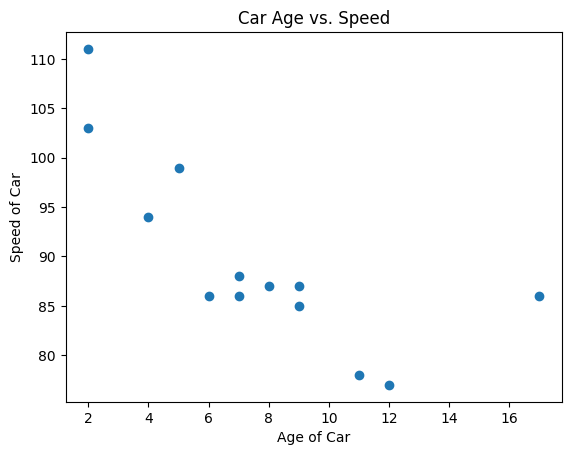

In [ ]:
#3.

import matplotlib.pyplot as plt #
import numpy as np # Used for generating sample data

# Sample data representing car age and speed
x_values = np.array([5,7,8,7,2,17,2,9,4,11,12,9,6]) # Age of cars
y_values = np.array([99,86,87,88,111,86,103,87,94,78,77,85,86]) # Speed of cars

# Create the scatter plot
plt.scatter(x_values, y_values) #

# Add labels and a title for clarity
plt.xlabel("Age of Car") #
plt.ylabel("Speed of Car") #
plt.title("Car Age vs. Speed") #

# Display the plot
plt.show() #

Original DataFrame:
   Feature_A  Feature_B  Feature_C  Feature_D
0         10         25          5         50
1         20         35          5         40
2         30         45         25         30
3         40         55         15         20
4         50         65         35         10

Correlation Matrix:
           Feature_A  Feature_B  Feature_C  Feature_D
Feature_A   1.000000   1.000000   0.848875  -1.000000
Feature_B   1.000000   1.000000   0.848875  -1.000000
Feature_C   0.848875   0.848875   1.000000  -0.848875
Feature_D  -1.000000  -1.000000  -0.848875   1.000000


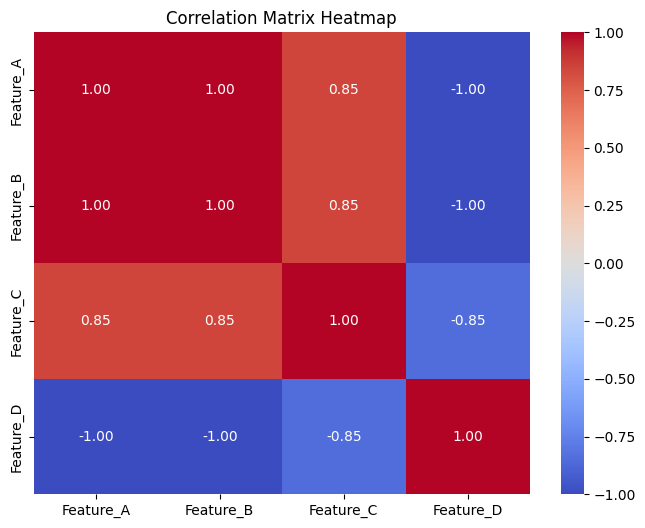

In [ ]:
#4.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a sample DataFrame
data = {
    'Feature_A': [10, 20, 30, 40, 50],
    'Feature_B': [25, 35, 45, 55, 65],
    'Feature_C': [5, 5, 25, 15, 35],
    'Feature_D': [50, 40, 30, 20, 10]
}
df = pd.DataFrame(data)

print("Original DataFrame:")
print(df)

correlation_matrix = df.corr()

print("\nCorrelation Matrix:")
print(correlation_matrix)

# Create the heatmap
plt.figure(figsize=(8, 6)) # Adjust the figure size for better readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", center=0)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [ ]:
#5.

import plotly.express as px # Import Plotly Express
import pandas as pd         # Import Pandas for data handling

# Create a sample DataFrame
data = {'Category': ['A', 'B', 'C', 'D', 'E'],
        'Value': [23, 45, 56, 12, 39]}
df = pd.DataFrame(data)

print("Original DataFrame:")
print(df)

# Create the bar plot using px.bar
fig = px.bar(df, x='Category', y='Value', title='Sample Bar Chart')

# Display the plot
fig.show()

Original DataFrame:
  Category  Value
0        A     23
1        B     45
2        C     56
3        D     12
4        E     39


In [ ]:
#6.

import pandas as pd

# Create a sample DataFrame
data = {'Name': ['Alice', 'Bob', 'Charlie', 'David'],
        'Score': [85, 92, 78, 88]}
df = pd.DataFrame(data)

print("Original DataFrame:")
print(df)

import numpy as np

# Add a new 'Grade' column based on the 'Score'
# Assign 'Pass' if score is 80 or higher, otherwise 'Fail'
df['Grade'] = np.where(df['Score'] >= 80, 'Pass', 'Fail')

print("\nDataFrame with new 'Grade' column:")
print(df)

Original DataFrame:
      Name  Score
0    Alice     85
1      Bob     92
2  Charlie     78
3    David     88

DataFrame with new 'Grade' column:
      Name  Score Grade
0    Alice     85  Pass
1      Bob     92  Pass
2  Charlie     78  Fail
3    David     88  Pass


In [ ]:
#7.
import numpy as np

# Create two sample 2D NumPy arrays
array1 = np.array([[1, 2, 3],
                   [4, 5, 6]])

array2 = np.array([[7, 8, 9],
                   [10, 11, 12]])

# Perform element-wise multiplication using the * operator
result_array = array1 * array2

print("Array 1:\n", array1)
print("\nArray 2:\n", array2)
print("\nResult of element-wise multiplication:\n", result_array)


# Create two sample 1D NumPy arrays
array1 = np.array([1, 2, 3])
array2 = np.array([4, 5, 6])

# Perform element-wise multiplication using np.multiply()
result_array = np.multiply(array1, array2)

print("Array 1:", array1)
print("Array 2:", array2)
print("Result of element-wise multiplication:", result_array)

Array 1:
 [[1 2 3]
 [4 5 6]]

Array 2:
 [[ 7  8  9]
 [10 11 12]]

Result of element-wise multiplication:
 [[ 7 16 27]
 [40 55 72]]
Array 1: [1 2 3]
Array 2: [4 5 6]
Result of element-wise multiplication: [ 4 10 18]


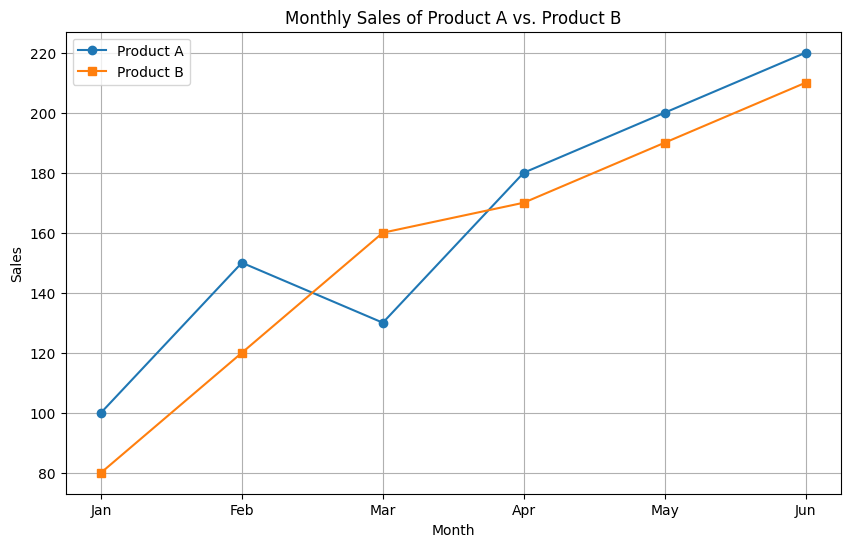

In [ ]:
#8.

import matplotlib.pyplot as plt

# Data for multiple lines
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']
sales_a = [100, 150, 130, 180, 200, 220]
sales_b = [80, 120, 160, 170, 190, 210]

# Create the plot
plt.figure(figsize=(10, 6)) # Optional: set the figure size for better display
plt.plot(months, sales_a, label='Product A', marker='o')
plt.plot(months, sales_b, label='Product B', marker='s')

# Add titles and labels
plt.xlabel("Month")
plt.ylabel("Sales")
plt.title("Monthly Sales of Product A vs. Product B")

# Add a legend
plt.legend()

# Show the plot
plt.grid(True) # Optional: add a grid for readability
plt.show()

In [ ]:
#9.
import pandas as pd

# Create a sample DataFrame
data = {
    'product': ['A', 'B', 'C', 'D', 'E'],
    'sales': [120, 250, 80, 310, 190]
}
df = pd.DataFrame(data)

print("Original DataFrame:")
print(df)

# Define the threshold
threshold = 200

# Create a boolean Series (mask) where 'sales' is greater than the threshold
sales_above_threshold = df['sales'] > threshold

# Filter the DataFrame using the boolean mask
filtered_df = df[sales_above_threshold]

print(f"\nFiltered DataFrame (sales > {threshold}):")
print(filtered_df)

Original DataFrame:
  product  sales
0       A    120
1       B    250
2       C     80
3       D    310
4       E    190

Filtered DataFrame (sales > 200):
  product  sales
1       B    250
3       D    310


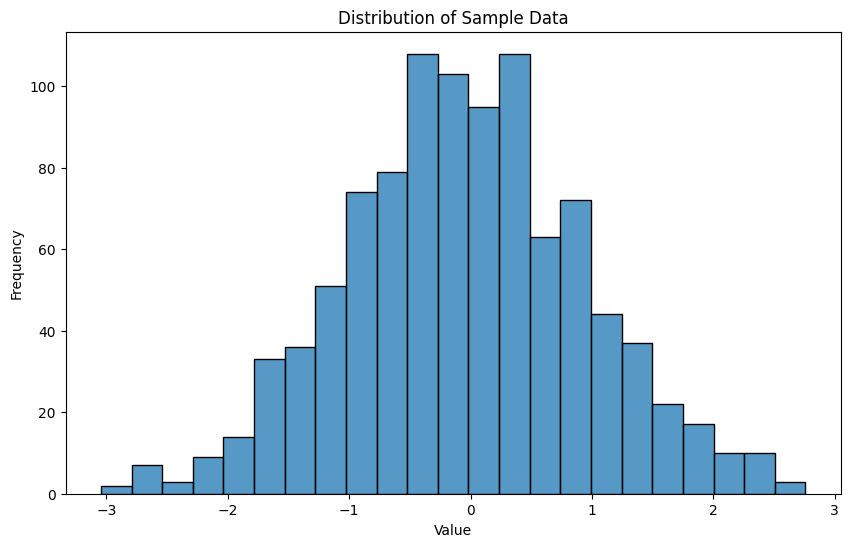

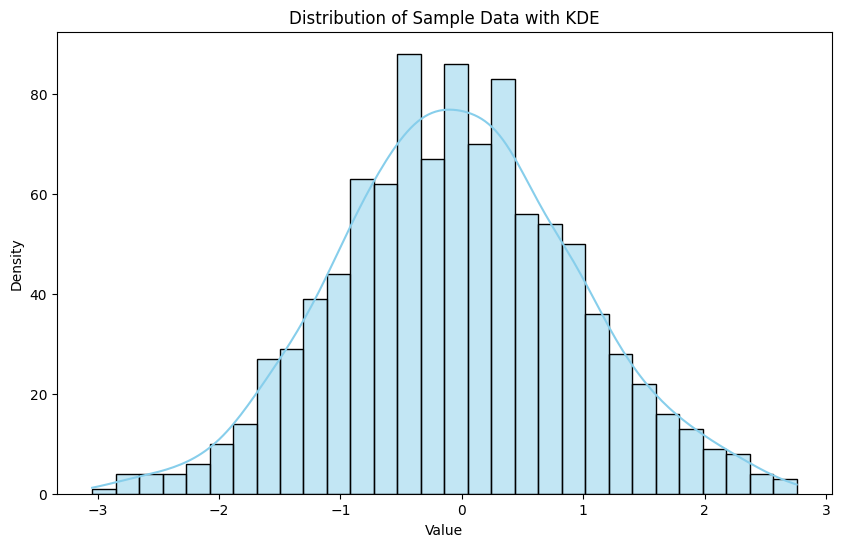

In [ ]:
#10.
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Create a sample DataFrame with random data
np.random.seed(0) # for reproducibility
data = np.random.randn(1000)
df = pd.DataFrame(data, columns=['value'])

# Create the histogram
plt.figure(figsize=(10, 6)) # Set the figure size
sns.histplot(data=df, x='value')

# Add a title and labels for clarity
plt.title('Distribution of Sample Data')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Display the plot
plt.show()

# Customize the histogram with KDE, more bins, and a different color
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='value', bins=30, kde=True, color='skyblue')

plt.title('Distribution of Sample Data with KDE')
plt.xlabel('Value')
plt.ylabel('Density')

plt.show()

In [ ]:
#11.

import numpy as np

# Define two matrices
matrix_a = np.array([
    [1, 2, 3],
    [4, 5, 6]
])

matrix_b = np.array([
    [7, 8],
    [9, 10],
    [11, 12]
])

# Perform matrix multiplication using the @ operator
result_at = matrix_a @ matrix_b

print("Matrix A:\n", matrix_a)
print("\nMatrix B:\n", matrix_b)
print("\nResult using @ operator:\n", result_at)

import numpy as np

# Define two matrices
matrix_a = np.array([
    [1, 2],
    [3, 4]
])

matrix_b = np.array([
    [5, 6],
    [7, 8]
])

# Perform matrix multiplication using np.dot()
result_dot = np.dot(matrix_a, matrix_b)

print("Matrix A:\n", matrix_a)
print("\nMatrix B:\n", matrix_b)
print("\nResult using np.dot():\n", result_dot)

import numpy as np

# Define two matrices
matrix_a = np.array([
    [1, 2, 3],
    [4, 5, 6]
])

matrix_b = np.array([
    [7, 8],
    [9, 10],
    [11, 12]
])

# Perform matrix multiplication using np.matmul()
result_matmul = np.matmul(matrix_a, matrix_b)

print("Matrix A:\n", matrix_a)
print("\nMatrix B:\n", matrix_b)
print("\nResult using np.matmul():\n", result_matmul)

Matrix A:
 [[1 2 3]
 [4 5 6]]

Matrix B:
 [[ 7  8]
 [ 9 10]
 [11 12]]

Result using @ operator:
 [[ 58  64]
 [139 154]]
Matrix A:
 [[1 2]
 [3 4]]

Matrix B:
 [[5 6]
 [7 8]]

Result using np.dot():
 [[19 22]
 [43 50]]
Matrix A:
 [[1 2 3]
 [4 5 6]]

Matrix B:
 [[ 7  8]
 [ 9 10]
 [11 12]]

Result using np.matmul():
 [[ 58  64]
 [139 154]]


In [ ]:
#12.

import pandas as pd

# Load a CSV file from a URL into a DataFrame
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv'
df = pd.read_csv(url)

# Print a header for clarity
print("First 5 rows of the DataFrame:")

# Display the first 5 rows
print(df.head())

First 5 rows of the DataFrame:
   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75


In [ ]:
#13.

import plotly.express as px
import pandas as pd
import numpy as np

# Create a sample DataFrame
np.random.seed(42) # for reproducibility
data = {
    'x_data': np.random.rand(50) * 10,
    'y_data': np.random.rand(50) * 10,
    'z_data': np.random.rand(50) * 10,
    'category': np.random.choice(['Group A', 'Group B', 'Group C'], 50),
    'size_data': np.random.rand(50) * 20 + 5 # For varying marker sizes
}
df = pd.DataFrame(data)

print("Sample DataFrame:")
print(df.head())

# Create the 3D scatter plot
fig = px.scatter_3d(
    df,
    x='x_data',
    y='y_data',
    z='z_data',
    color='category',
    size='size_data',
    hover_data=['category'],
    title='3D Scatter Plot of Sample Data',
    labels={
        'x_data': 'X-axis Label',
        'y_data': 'Y-axis Label',
        'z_data': 'Z-axis Label',
        'category': 'Data Category'
    }
)

# Customize the layout (optional)
fig.update_layout(
    scene_aspectmode='cube' # Ensures axes have equal scaling
)

# Display the plot
fig.show()

Sample DataFrame:
     x_data    y_data    z_data category  size_data
0  3.745401  9.695846  0.314292  Group A  24.643367
1  9.507143  7.751328  6.364104  Group A  15.332718
2  7.319939  9.394989  3.143560  Group C  10.216583
3  5.986585  8.948274  5.085707  Group B  24.925074
4  1.560186  5.979000  9.075665  Group B  24.308387
